# Exploratory Data Analysis

## We intend to answer the following questions in this notebook

1. What’s the quantity of data points whose first and last names appear in both datasets?
    * Investigate whether these could represent the same patient by looking at the similarity of sex, petname and dob. 
    * Is it possible that there could be typos in (sex, petname and dob) causing the data points to seem unrelated?


## Import packages

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

## Loading datasets

In [4]:
path1 = "../data/synthetic_facility_v3.csv"
path2 = "../data/synthetic_hdss_v3.csv" 

df_facility = pd.read_csv(path1)
df_hdss = pd.read_csv(path2)

## Exploring the facility dataset

In [5]:
df_facility.head()

,recnr,firstname,lastname,petname,dob,sex,nationalid,patientid,visitdate
0,2,Fatuma,NaN,Zaina,24-08-2017 00:00,2,N_ID_5000,2069,10-09-2018
1,3,Gloria,Rashida,NaN,11-07-1993 00:00,2,N_ID_11861,2079,14-12-2022
2,4,Ali,Hakram,Igomu,17-05-2014 00:00,1,N_ID_11864,2080,09-06-2023
3,5,Nakalema,NaN,Nkwanga,27-02-2026 00:00,2,N_ID_11867,2081,07-02-2019
4,6,Asuman,Sempa,Aguti,02-03-2002 00:00,1,N_ID_11870,2082,18-08-2020


In [6]:
fac_rows, fac_columns = df_facility.shape

print(f"The facility dataset has {fac_rows} rows and {fac_columns}")

The facility dataset has 2902 rows and 9


In [10]:
df_facility.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2902 entries, 0 to 2901
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   recnr       2902 non-null   int64 
 1   firstname   2902 non-null   object
 2   lastname    2835 non-null   object
 3   petname     2511 non-null   object
 4   dob         2902 non-null   object
 5   sex         2902 non-null   int64 
 6   nationalid  2902 non-null   object
 7   patientid   2902 non-null   int64 
 8   visitdate   2902 non-null   object
dtypes: int64(3), object(6)
memory usage: 204.2+ KB


From the dataframe information above, we can confirm that lastname and petname are the only columns with missing data

#### Question: How many unique combinations of the first, last and pet names are in this table?

In [13]:
df_facility_unique_names = df_facility.groupby(['firstname',
                                                'lastname',
                                                'petname']).size().reset_index(name='count')

df_facility_unique_names.head()

,firstname,lastname,petname,count
0,Ababu,Crispus,Lwasa,1
1,Abalyogera,Namulondo,Omutima,1
2,Abasa,Bukosi,Awiti,1
3,Abasa,Nathan,Nakalanzi,1
4,Abatuka,Nahiya,Fanda,1


In [14]:
print(df_facility_unique_names.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2116 entries, 0 to 2115
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   firstname  2116 non-null   object
 1   lastname   2116 non-null   object
 2   petname    2116 non-null   object
 3   count      2116 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 66.2+ KB
None


In [12]:
df_facility_unique_names.shape

(2116, 4)

From the exploration above, we can conclude that there are 2116 unique combinations of the names (firstname, lastname, petname)

### Question: What's the range of duplication? How often are unique names duplicated?

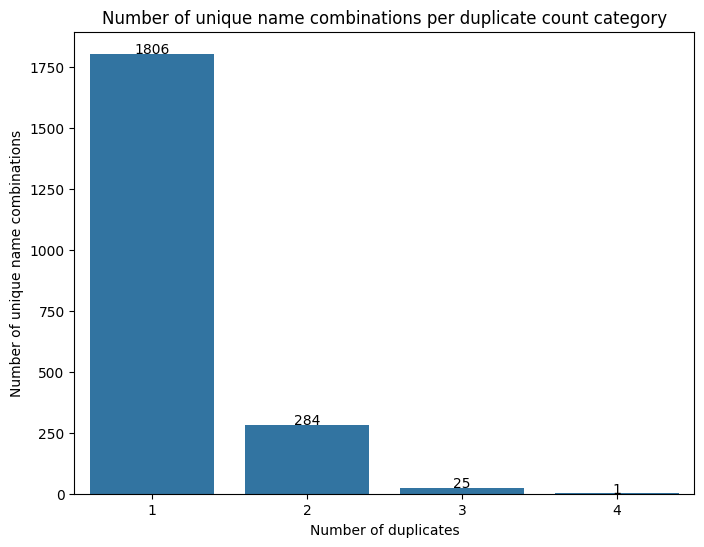

In [18]:
unique_name_combination_counts = df_facility_unique_names['count'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=unique_name_combination_counts.index, y=unique_name_combination_counts.values)

# Add values on top of bars
for index, value in enumerate(unique_name_combination_counts):
    plt.text(index, value + 0.1, str(value), ha='center')

plt.title('Number of unique name combinations per duplicate count category')
plt.xlabel('Number of duplicates')
plt.ylabel('Number of unique name combinations')
plt.show()

Assuming that a unique combination of (firstname, lastname and petname) represents a person.

From the chart above, we can conclude that in the facility dataset:

1. 1805 persons are not duplicated
2. 284 persons are duplicated twice
3. 25 persons are duplicated thrice
4. 1 person is duplicated four times

### Additional questions

- Is it possible that a data point with a missing value for either lastname or petname could represent of a duplicate for a person that already exists in the the dataset. This needs to be investigated by looking at other features such as **dob** and **patientid**.
- Could we possibly have a typo in one of the (first, last, and pet names), causing a data point to appear unique, yet in actuality, it is a duplicate? We need at least one example to verify this.
- ** Feel free to update this list **

In [ ]:
df

## Exploring the HDSS dataset